In [0]:
#unzipping the files for data 
import zipfile
with zipfile.ZipFile('bbc-news-summary.zip', 'r') as zip_ref:
    zip_ref.extractall('')

In [3]:
import numpy as np
import pandas as pd
import nltk
nltk.download('punkt') # one time execution
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [0]:
import os
business_texts=os.listdir('bbc news summary/BBC News Summary/News Articles/business')

In [0]:
#Tokenization 
from nltk.tokenize import sent_tokenize
sentences = []
root='bbc news summary/BBC News Summary/News Articles/business'
for s in business_texts:
  file_ = open(root+'/'+s, "r") 
  business_file=file_.read().replace('\n', '.')
  business_file=business_file.split('.')
  for sent in business_file:
    if sent!='':
      if sent[0].isdigit():
        sentences[-1][0]+=sent_tokenize(sent)[0]
      else:
        sentences.append(sent_tokenize(sent))


In [34]:
sentences

[['Kraft cuts snack ads for children'],
 ['Kraft plans to cut back on advertising of products like Oreo cookies and sugary Kool-Aid drinks as part of an effort to promote healthy eating'],
 ['The largest US food maker will also add a label to its more nutritional and low-fat brands to promote the benefits'],
 [' Kraft rival PepsiCo began a similar labelling initiative last year'],
 [' The moves come as the firms face criticism from consumer groups concerned at rising levels of obesity in US children'],
 [' Major food manufacturers have recently been reformulating the content of some calorie-heavy products'],
 ["Kraft's new advertising policy, which covers advertising on TV, radio and in print publications, is aimed at children between the ages of six and 11"],
 [' It means commercials for some of its most famous snacks and cereals shown during early morning cartoon shows on TV will now be replaced by food and drink qualifying for Kraft\'s new "Sensible Solution" label'],
 [' But the fi

In [7]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip

--2019-12-02 15:00:19--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2019-12-02 15:00:20--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2019-12-02 15:00:20--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip.1’

glove

In [0]:
import re
clean_sentences = []
ind=0
while ind < len(sentences):
  i=sentences[ind]
  regex = re.compile('[^a-zA-Z]')
  if len(i)!=0:
    clean_sentences.append(regex.sub(' ', i[0]))
    ind+=1
  else:
    del sentences[ind]

clean_sentences = [s.lower() for s in clean_sentences]

In [0]:
stop_words= ['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'between',
 'into',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'other',
 'some',
 'such',
 'only',
 'own',
 'so',
 'than',
 'too',
 'very',
 's',
 't',
 'can',
 'will',
 'just',
 'now',
 'm',
 'd',
 'll',
 'could',
 'would',
 'more',
 'also',
 'said',
 'mr',
 'however',
 'may']

In [0]:
# function to remove stopwords
def remove_stopwords(sen):
    sen_new = " ".join([i for i in sen if i not in stop_words])
    return sen_new

In [0]:
# remove stopwords from the sentences
clean_sentences = [remove_stopwords(r.split()) for r in clean_sentences]

In [0]:
# Extract word vectors
import numpy as np
word_embeddings = {}
f = open('glove.6B.100d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    word_embeddings[word] = coefs
f.close()

In [0]:
business_words={}
for i in clean_sentences:
  if len(i)!=0:
    for w in i.split():
      if w not in business_words:
        business_words[w]=1
      else:
        business_words[w]+=1
        
bs_words=pd.DataFrame.from_dict({'words':list(business_words.keys()),'counts':list(business_words.values()) })
bs_words=bs_words.set_index('words')

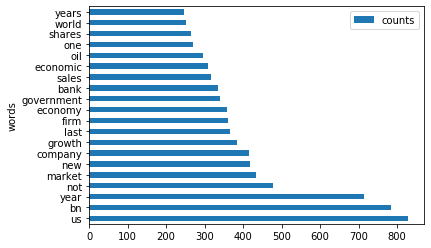

In [0]:
top_twenty=bs_words.nlargest(20, ['counts'])
ax = top_twenty.plot.barh(x=None, y='counts', rot=0)

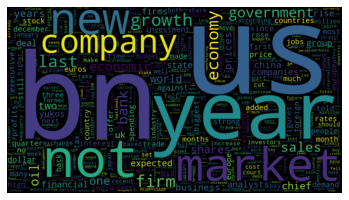

In [0]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=900,height=500, max_words=1628,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(business_words)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [0]:
sentence_vectors = []
for i in clean_sentences:
  if len(i) != 0:
    v = sum([word_embeddings.get(w, np.zeros((100,))) for w in i.split()])/(len(i.split())+0.001)
  else:
    v = np.zeros((100,))
  sentence_vectors.append(np.array(v))

sentence_vectors=np.array(sentence_vectors)

In [12]:
def cosine_similarities(mat):
  norm = (mat.T * mat.T).sum(0, keepdims=True) ** .5
  return (mat @ mat.T ) / norm.T / norm 

sim_mat=cosine_similarities(sentence_vectors)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
from scipy import sparse
sim_mat[sim_mat < 0.9]=0
for i in range(8684):
  sim_mat[i,i] = 0
sim_mat[np.isnan(sim_mat)] =0
sparse_mat = sparse.csr_matrix(sim_mat)
sparse_mat.eliminate_zeros()

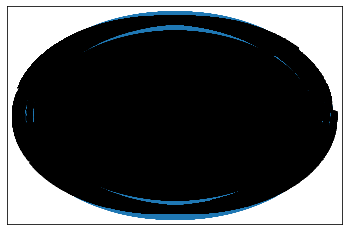

In [28]:
import networkx as nx
SimilarityGraph = nx.from_scipy_sparse_matrix(sparse_mat)
#print the graph
nx.draw_networkx(SimilarityGraph,pos=nx.shell_layout(SimilarityGraph), with_labels=True)

In [42]:
scores = nx.pagerank(SimilarityGraph)
ranked_sentences = sorted(((scores[i],s) for i,s in enumerate(sentences)), reverse=True)
# Extract top 10 sentences as the summary
for i in range(10):
  print(ranked_sentences[i][1])


[" However, analysts say they expected most shareholders would be holding back from selling all their shares immediately, as Google's good performance and future growth potential means demand will hold"]
["Thursday's new low for the dollar came after data was released showing year-on-year sales of new homes in the US had fallen 12% in November - with some analysts saying this could indicate problems ahead for consumer activity"]
['" Mr Majumdar also said an assessment should be made as to whether foreign investment is indeed beneficial to the country - in terms of employment and money generated - or just another way of international companies filling their deep pockets']
["Most EU countries have failed to put in place policies aimed at making Europe the world's most competitive economy by the end of the decade, a report says"]
['" The CBI found some firms managed to increase prices for the first time in nine years - but many said increases failed to keep up the rise in costs']
[" Job c